In [1]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

2023-11-20 19:24:02.282504: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-20 19:24:02.872886: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-11-20 19:24:03.510972: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-20 19:24:03.534785: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
from tensorflow.keras import regularizers

In [3]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [4]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [5]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [6]:
tf.keras.backend.clear_session()

In [7]:
subject = 'Pernambuco - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 0
train_split = split_index + 1 - 12

In [8]:
data = pd.read_csv('2003_mo_model_input_PE.csv')
pd.set_option('display.max_columns', None)
data

,Unnamed: 0,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Pernambuco - Consumo de Cimento (t),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),População,PPC (US$),Taxa Selic (%),Pernambuco - IDH Longevidade
0,2003-1,0.659695,5.799059e+06,0.297418,34.266080,99.743,2.096826,1012.239458,1768.569550,25.820814,20.730423,73.547765,2.408009,10666.238800,8.237381e+07,5.574893e+06,8.646979,7.571061e+07,0.688685,8.294029,0.635245,384683.093871,7.330309e+06,231.510748,2.097001e+06,1.036534,3.656420,0.969649,0.724032,-5331.049150,11.520143,126.459809,1.772069e+08,169.247665,1.611498,0.765509
1,2003-2,0.659840,5.821974e+06,0.298912,34.126272,86.997,2.096788,1012.240419,1767.661814,25.820777,20.733369,73.564536,2.408009,10766.569569,8.248102e+07,5.580364e+06,8.650960,7.575437e+07,0.689009,8.288006,0.635703,385266.203928,7.335910e+06,208.710157,2.000523e+06,0.993449,3.654697,0.950783,0.690297,-5318.079644,11.189862,126.581813,1.773884e+08,170.176810,1.450389,0.765971
2,2003-3,0.659986,5.844889e+06,0.300346,34.414272,83.033,2.096740,1012.240980,1767.132301,25.820756,20.735088,73.574319,2.408009,10861.937347,8.258823e+07,5.585835e+06,8.654941,7.579812e+07,0.689334,8.281983,0.636160,385305.059560,7.341511e+06,227.704841,1.963278e+06,0.973020,3.654266,0.938332,0.669681,-5436.417870,10.820792,126.703818,1.775699e+08,171.135713,1.870184,0.766434
3,2003-4,0.660131,5.867804e+06,0.301729,34.576094,82.302,2.096680,1012.241040,1767.075567,25.820754,20.735272,73.575367,2.408009,10953.794847,8.269544e+07,5.591305e+06,8.658922,7.584188e+07,0.689658,8.275960,0.636618,385752.052697,7.347112e+06,278.121073,1.954187e+06,0.940489,3.653595,0.926401,0.660494,-5707.015274,10.417840,126.825822,1.777514e+08,172.116904,1.355287,0.766896
4,2003-5,0.660277,5.890719e+06,0.302368,34.890197,80.217,2.076740,1012.120648,1783.069193,25.939427,20.766986,73.233157,2.418925,11040.490019,8.280265e+07,5.596776e+06,8.662903,7.588563e+07,0.689983,8.269937,0.637075,387164.022451,7.352713e+06,344.827633,1.975493e+06,0.917493,3.650266,0.951683,0.648337,-5599.317941,9.959690,126.976217,1.779329e+08,173.072271,1.585538,0.767358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36296.187024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2023-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36276.684662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,2023-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36211.583947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,2023-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36119.315381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


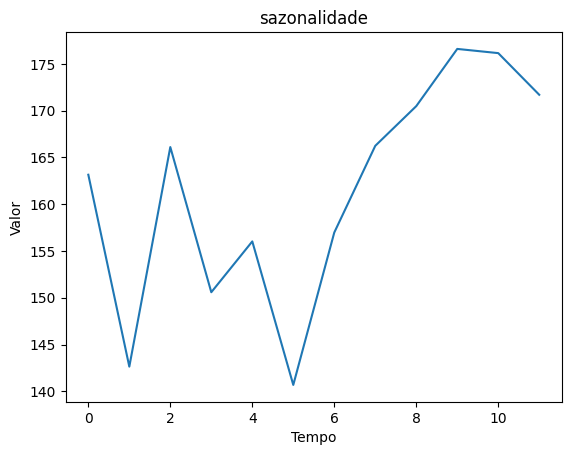

,sazonalidade
sazonalidade,
0,163.149929
1,142.635453
2,166.107737
3,150.589369
4,156.022401
5,140.680786
6,156.972225
7,166.239614
8,170.483237


In [9]:
def calculate_monthly_means(consume_of_cement, subject):
    df = pd.DataFrame({subject: consume_of_cement[:train_split]})
    df['sazonalidade'] = df.index % 12
    monthly_means = df.groupby('sazonalidade')[subject].mean()
    result_df = pd.DataFrame({'sazonalidade': monthly_means})

    return result_df

media_df = calculate_monthly_means(data[subject], subject)
plot_columns(media_df)
media_df

In [10]:
def fill_original_df_with_monthly_means(df_og, media_df):
    monthly_means = media_df['sazonalidade'].tolist()
    df_og['sazonalidade'] = [monthly_means[i % 12] for i in range(len(df_og))]
    return df_og

data = fill_original_df_with_monthly_means(data, media_df)
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data

,Unnamed: 0,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),População,PPC (US$),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade,Pernambuco - Consumo de Cimento (t)
0,2003-1,0.659695,5.799059e+06,0.297418,34.266080,2.096826,1012.239458,1768.569550,25.820814,20.730423,73.547765,2.408009,10666.238800,8.237381e+07,5.574893e+06,8.646979,7.571061e+07,0.688685,8.294029,0.635245,384683.093871,7.330309e+06,231.510748,2.097001e+06,1.036534,3.656420,0.969649,0.724032,-5331.049150,11.520143,126.459809,1.772069e+08,169.247665,1.611498,0.765509,163.149929,99.743
1,2003-2,0.659840,5.821974e+06,0.298912,34.126272,2.096788,1012.240419,1767.661814,25.820777,20.733369,73.564536,2.408009,10766.569569,8.248102e+07,5.580364e+06,8.650960,7.575437e+07,0.689009,8.288006,0.635703,385266.203928,7.335910e+06,208.710157,2.000523e+06,0.993449,3.654697,0.950783,0.690297,-5318.079644,11.189862,126.581813,1.773884e+08,170.176810,1.450389,0.765971,142.635453,86.997
2,2003-3,0.659986,5.844889e+06,0.300346,34.414272,2.096740,1012.240980,1767.132301,25.820756,20.735088,73.574319,2.408009,10861.937347,8.258823e+07,5.585835e+06,8.654941,7.579812e+07,0.689334,8.281983,0.636160,385305.059560,7.341511e+06,227.704841,1.963278e+06,0.973020,3.654266,0.938332,0.669681,-5436.417870,10.820792,126.703818,1.775699e+08,171.135713,1.870184,0.766434,166.107737,83.033
3,2003-4,0.660131,5.867804e+06,0.301729,34.576094,2.096680,1012.241040,1767.075567,25.820754,20.735272,73.575367,2.408009,10953.794847,8.269544e+07,5.591305e+06,8.658922,7.584188e+07,0.689658,8.275960,0.636618,385752.052697,7.347112e+06,278.121073,1.954187e+06,0.940489,3.653595,0.926401,0.660494,-5707.015274,10.417840,126.825822,1.777514e+08,172.116904,1.355287,0.766896,150.589369,82.302
4,2003-5,0.660277,5.890719e+06,0.302368,34.890197,2.076740,1012.120648,1783.069193,25.939427,20.766986,73.233157,2.418925,11040.490019,8.280265e+07,5.596776e+06,8.662903,7.588563e+07,0.689983,8.269937,0.637075,387164.022451,7.352713e+06,344.827633,1.975493e+06,0.917493,3.650266,0.951683,0.648337,-5599.317941,9.959690,126.976217,1.779329e+08,173.072271,1.585538,0.767358,156.022401,80.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36296.187024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.022401,NaN
245,2023-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36276.684662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.680786,NaN
246,2023-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36211.583947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.972225,NaN
247,2023-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36119.315381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166.239614,NaN


In [11]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data

0       84.896
1       81.240
2      100.925
3       83.152
4       81.128
        ...   
244        NaN
245        NaN
246        NaN
247        NaN
248        NaN
Name: Pernambuco - Consumo de Cimento (t), Length: 249, dtype: float64

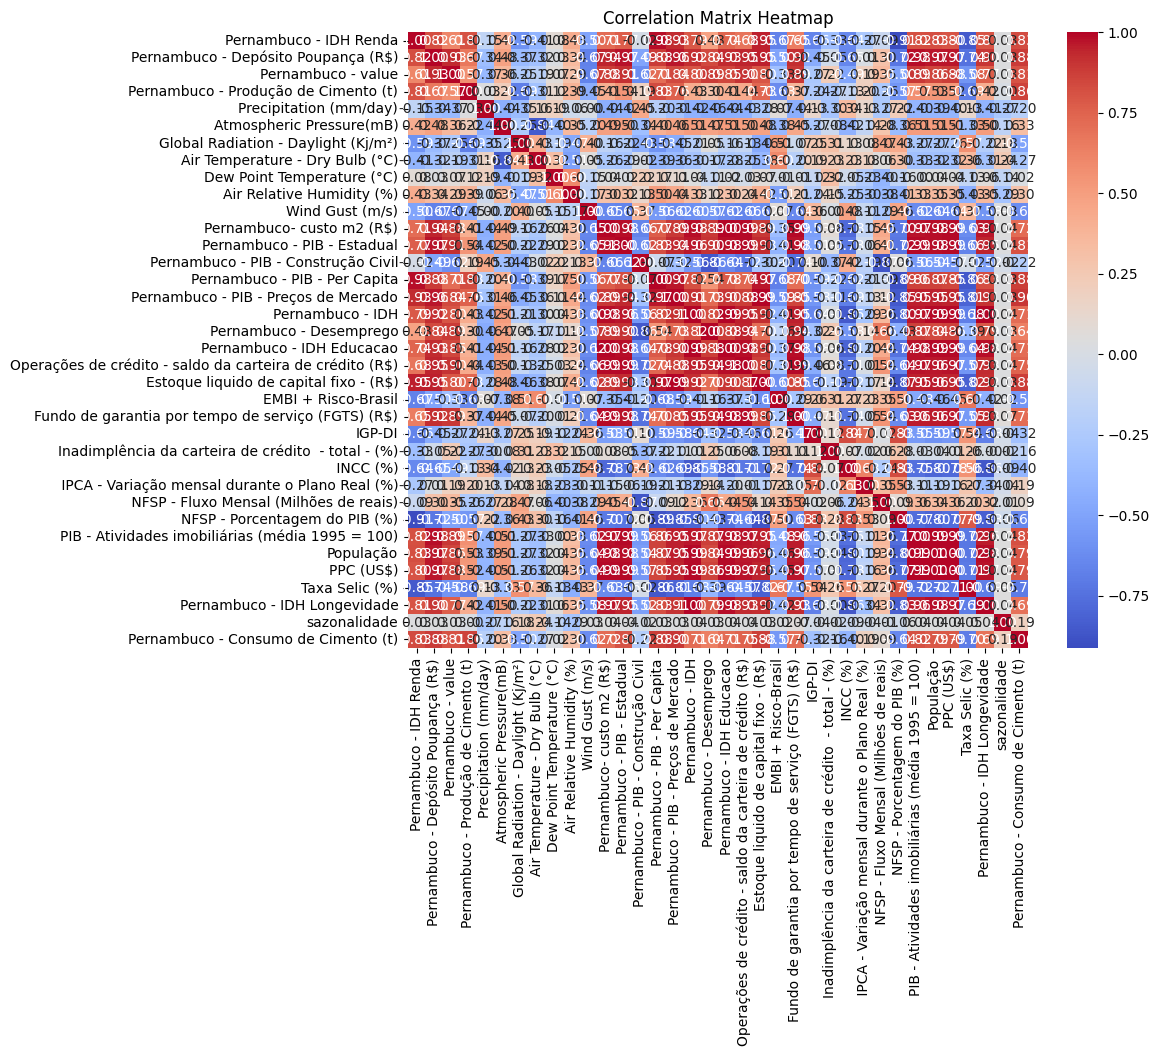

In [12]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

safe_data = data.iloc[:split_index + 1,1:-1]

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

def remove_high_vif_columns(dataframe, threshold=1000):
    i=0
    while True:
        vif_result = calculate_vif(dataframe)
        high_vif_column = vif_result.loc[vif_result["VIF"].idxmax()]["Feature"]
        
        if vif_result["VIF"].max() <= threshold:
            print(f"Num columns removed: {i}")
            return dataframe
        i += 1
        dataframe = dataframe.drop(high_vif_column, axis=1)

In [14]:
safe_data = data.iloc[:split_index + 1,1:-1]
vif_info = calculate_vif(safe_data)
vif_info

,Feature,VIF
0,Pernambuco - IDH Renda,2.543713e+09
1,Pernambuco - Depósito Poupança (R$),1.477510e+05
2,Pernambuco - value,3.043636e+05
3,Pernambuco - Produção de Cimento (t),7.301003e+04
4,Precipitation (mm/day),1.215613e+02
5,Atmospheric Pressure(mB),2.291198e+07
6,Global Radiation - Daylight (Kj/m²),8.846837e+02
7,Air Temperature - Dry Bulb (°C),5.697077e+04
8,Dew Point Temperature (°C),2.649018e+04
9,Air Relative Humidity (%),1.193171e+04


In [15]:
data = remove_high_vif_columns(safe_data, 100000000)
data

Num columns removed: 6


,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - Desemprego,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),PPC (US$),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade
0,5.799059e+06,0.297418,34.266080,2.096826,1012.239458,1768.569550,25.820814,20.730423,73.547765,2.408009,10666.238800,8.237381e+07,5.574893e+06,8.294029,3.846831e+05,7.330309e+06,231.510748,2.097001e+06,1.036534,3.656420,0.969649,0.724032,-5331.049150,11.520143,126.459809,169.247665,1.611498,0.765509,163.149929
1,5.821974e+06,0.298912,34.126272,2.096788,1012.240419,1767.661814,25.820777,20.733369,73.564536,2.408009,10766.569569,8.248102e+07,5.580364e+06,8.288006,3.852662e+05,7.335910e+06,208.710157,2.000523e+06,0.993449,3.654697,0.950783,0.690297,-5318.079644,11.189862,126.581813,170.176810,1.450389,0.765971,142.635453
2,5.844889e+06,0.300346,34.414272,2.096740,1012.240980,1767.132301,25.820756,20.735088,73.574319,2.408009,10861.937347,8.258823e+07,5.585835e+06,8.281983,3.853051e+05,7.341511e+06,227.704841,1.963278e+06,0.973020,3.654266,0.938332,0.669681,-5436.417870,10.820792,126.703818,171.135713,1.870184,0.766434,166.107737
3,5.867804e+06,0.301729,34.576094,2.096680,1012.241040,1767.075567,25.820754,20.735272,73.575367,2.408009,10953.794847,8.269544e+07,5.591305e+06,8.275960,3.857521e+05,7.347112e+06,278.121073,1.954187e+06,0.940489,3.653595,0.926401,0.660494,-5707.015274,10.417840,126.825822,172.116904,1.355287,0.766896,150.589369
4,5.890719e+06,0.302368,34.890197,2.076740,1012.120648,1783.069193,25.939427,20.766986,73.233157,2.418925,11040.490019,8.280265e+07,5.596776e+06,8.269937,3.871640e+05,7.352713e+06,344.827633,1.975493e+06,0.917493,3.650266,0.951683,0.648337,-5599.317941,9.959690,126.976217,173.072271,1.585538,0.767358,156.022401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.258886e+07,0.369503,35.236698,1.090690,1014.070733,1788.166926,25.148702,20.925799,78.593751,1.699903,24529.478949,9.831632e+07,5.350242e+06,14.433281,3.068648e+06,7.783063e+06,273.655482,1.001735e+07,0.471521,3.683580,0.378150,0.366904,-5783.316460,2.206994,196.778355,416.859692,0.583985,0.808166,166.239614
176,1.262437e+07,0.370642,34.441113,0.901898,1013.509114,1798.725505,25.426412,20.826343,76.887372,1.753207,24615.092292,9.827680e+07,5.350813e+06,14.412285,3.070265e+06,7.780841e+06,269.131737,9.868983e+06,0.476827,3.634735,0.377666,0.358935,-6001.730740,2.215328,197.255170,417.748887,0.753312,0.808089,170.483237
177,1.265988e+07,0.371825,33.837131,0.821841,1012.796953,1801.267986,25.978904,20.846826,74.659369,1.757264,24699.335651,9.823728e+07,5.351384e+06,14.391288,3.078615e+06,7.778619e+06,265.863958,1.025520e+07,0.475427,3.545663,0.377838,0.354313,-6454.887704,2.232466,197.731985,418.601189,0.882343,0.808011,176.598786
178,1.269539e+07,0.372959,33.331136,0.846972,1012.158901,1815.496781,26.310702,21.019361,74.020494,1.692128,24780.996193,9.819777e+07,5.351954e+06,14.370291,3.083099e+06,7.776397e+06,263.741041,1.073635e+07,0.491301,3.476080,0.370057,0.352728,-6243.191421,2.263185,198.211712,419.430070,1.004174,0.807933,176.149964


In [16]:
input_data = data.iloc[:split_index + 1,1:]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
input_data

,Pernambuco - value,Pernambuco - Produção de Cimento (t),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - Desemprego,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),PPC (US$),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade
0,-0.965999,-1.307830,0.616636,-0.158460,0.537491,-0.194309,-0.635386,-0.509598,0.791261,-1.623818,-1.693326,-0.288657,-0.799211,-1.310937,-2.299937,-0.582539,-1.302390,3.921218,1.209036,3.214079,2.802383,0.604311,4.268118,-1.845112,-1.798021,2.127040,-2.209335,0.146263
1,-0.915774,-1.314466,0.616552,-0.157647,0.533672,-0.194352,-0.631795,-0.506032,0.791261,-1.599694,-1.673783,-0.254430,-0.801299,-1.310358,-2.263992,-0.792841,-1.336546,3.582946,1.203470,3.051841,2.402642,0.609431,4.096014,-1.839712,-1.785942,1.562580,-2.169313,-1.612555
2,-0.867579,-1.300796,0.616446,-0.157173,0.531445,-0.194377,-0.629700,-0.503951,0.791261,-1.576762,-1.654240,-0.220203,-0.803387,-1.310320,-2.228047,-0.617643,-1.349731,3.422548,1.202078,2.944772,2.158351,0.562720,3.903698,-1.834313,-1.773475,3.033368,-2.129290,0.399852
3,-0.821065,-1.293115,0.616313,-0.157122,0.531206,-0.194380,-0.629476,-0.503728,0.791261,-1.554675,-1.634698,-0.185977,-0.805475,-1.309876,-2.192102,-0.152627,-1.352950,3.167136,1.199914,2.842174,2.049492,0.455907,3.693727,-1.828913,-1.760719,1.229384,-2.089268,-0.930622
4,-0.799614,-1.278206,0.572245,-0.258958,0.598485,-0.054985,-0.590822,-0.576502,0.811212,-1.533828,-1.615155,-0.151750,-0.807563,-1.308476,-2.156157,0.462644,-1.345407,2.986591,1.189162,3.059587,1.905441,0.498418,3.454992,-1.822257,-1.748299,2.036088,-2.049246,-0.464819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.457421,-1.261759,-1.606999,1.390568,0.619929,-0.983779,-0.397257,0.563477,-0.502893,1.709644,1.212742,-1.694181,1.328965,1.351069,0.605679,-0.193815,1.501633,-0.514871,1.296737,-1.872446,-1.429358,0.425789,-0.584804,1.266999,1.421090,-1.472938,1.484298,0.411158
176,1.495700,-1.299522,-2.024243,0.915509,0.664344,-0.657579,-0.518477,0.200600,-0.405473,1.730230,1.205538,-1.690610,1.321687,1.352673,0.591420,-0.235540,1.449107,-0.473208,1.139013,-1.876611,-1.523783,0.339575,-0.580461,1.288102,1.432650,-0.879688,1.477549,0.774987
177,1.535488,-1.328191,-2.201176,0.313111,0.675040,-0.008615,-0.493511,-0.273205,-0.398057,1.750487,1.198335,-1.687039,1.314408,1.360954,0.577161,-0.265681,1.585840,-0.484199,0.851392,-1.875135,-1.578548,0.160702,-0.571531,1.309204,1.443731,-0.427616,1.470800,1.299306
178,1.573594,-1.352208,-2.145633,-0.226601,0.734894,0.381119,-0.283221,-0.409068,-0.517103,1.770122,1.191131,-1.683469,1.307130,1.365401,0.562902,-0.285262,1.756179,-0.359568,0.626702,-1.942040,-1.597335,0.244264,-0.555524,1.330436,1.454507,-0.000772,1.464052,1.260827


In [17]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Pernambuco - value,Pernambuco - Produção de Cimento (t),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - Desemprego,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),PPC (US$),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade
0,-0.965999,-1.307830,0.616636,-0.158460,0.537491,-0.194309,-0.635386,-0.509598,0.791261,-1.623818,-1.693326,-0.288657,-0.799211,-1.310937,-2.299937,-0.582539,-1.302390,3.921218,1.209036,3.214079,2.802383,0.604311,4.268118,-1.845112,-1.798021,2.127040,-2.209335,0.146263
1,-0.915774,-1.314466,0.616552,-0.157647,0.533672,-0.194352,-0.631795,-0.506032,0.791261,-1.599694,-1.673783,-0.254430,-0.801299,-1.310358,-2.263992,-0.792841,-1.336546,3.582946,1.203470,3.051841,2.402642,0.609431,4.096014,-1.839712,-1.785942,1.562580,-2.169313,-1.612555
2,-0.867579,-1.300796,0.616446,-0.157173,0.531445,-0.194377,-0.629700,-0.503951,0.791261,-1.576762,-1.654240,-0.220203,-0.803387,-1.310320,-2.228047,-0.617643,-1.349731,3.422548,1.202078,2.944772,2.158351,0.562720,3.903698,-1.834313,-1.773475,3.033368,-2.129290,0.399852
3,-0.821065,-1.293115,0.616313,-0.157122,0.531206,-0.194380,-0.629476,-0.503728,0.791261,-1.554675,-1.634698,-0.185977,-0.805475,-1.309876,-2.192102,-0.152627,-1.352950,3.167136,1.199914,2.842174,2.049492,0.455907,3.693727,-1.828913,-1.760719,1.229384,-2.089268,-0.930622
4,-0.799614,-1.278206,0.572245,-0.258958,0.598485,-0.054985,-0.590822,-0.576502,0.811212,-1.533828,-1.615155,-0.151750,-0.807563,-1.308476,-2.156157,0.462644,-1.345407,2.986591,1.189162,3.059587,1.905441,0.498418,3.454992,-1.822257,-1.748299,2.036088,-2.049246,-0.464819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.717812,-0.682771,-1.861651,1.466195,0.828079,-0.449900,-0.212860,0.255355,-0.444092,1.461171,1.255355,-1.688569,1.416529,1.407354,0.759879,0.731931,1.338281,-1.087000,1.252487,-1.491033,-0.960452,1.465326,-0.676734,1.091879,1.261902,0.499090,1.544430,0.411158
164,0.781222,-0.742355,-1.819727,0.974839,0.838233,0.071627,0.122554,0.097346,-0.253103,1.484670,1.256917,-1.694691,1.409206,1.402136,0.749001,0.583095,1.318191,-0.904679,1.414483,-1.525186,-1.007966,1.351131,-0.668750,1.100438,1.276272,0.323875,1.541852,0.774987
165,0.845390,-0.806950,-2.039971,0.440572,0.912578,0.567230,0.421949,-0.067366,-0.110764,1.508296,1.258479,-1.700812,1.401884,1.398719,0.738124,0.433167,1.483470,-0.900134,1.498244,-1.546744,-0.976556,1.143146,-0.657609,1.108997,1.290351,0.198030,1.539273,1.299306
166,0.907066,-0.870102,-2.062556,0.018002,0.889690,0.936674,0.705412,-0.128756,-0.109398,1.531896,1.260042,-1.706934,1.394561,1.393142,0.727246,0.297965,1.703486,-1.136836,1.476356,-1.586381,-1.146834,1.542609,-0.647588,1.117113,1.304501,0.502803,1.536695,1.260827


In [18]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0       84.896
1       81.240
2      100.925
3       83.152
4       81.128
        ...   
163    158.533
164    133.813
165    155.827
166    146.197
167    122.278
Name: Pernambuco - Consumo de Cimento (t), Length: 168, dtype: float64

In [19]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Pernambuco - value,Pernambuco - Produção de Cimento (t),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - Desemprego,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),PPC (US$),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade
168,1.043407,-0.978746,-0.741092,-0.502972,0.913820,1.260706,1.547454,0.300617,-0.341547,1.573581,1.263166,-1.719177,1.379915,1.376932,0.705491,0.146258,1.774331,-1.414596,1.544952,-1.619756,-1.269571,0.705135,-0.643748,1.133345,1.337633,-0.848841,1.531538,0.146263
169,1.104366,-1.032880,-0.091379,-0.540801,0.760849,1.062061,1.936466,0.803004,-0.603391,1.591641,1.255963,-1.715606,1.372637,1.372955,0.691232,0.069548,1.603011,-1.326123,1.687834,-1.703430,-1.318025,1.050348,-0.639696,1.154937,1.349730,-0.710205,1.524790,-1.612555
170,1.160270,-1.077785,0.457950,-0.286404,0.640196,0.596712,2.225730,1.391805,-0.790519,1.609727,1.248759,-1.712035,1.365358,1.369449,0.676973,-0.001029,1.566915,-1.203988,1.921399,-1.791187,-1.274124,0.891008,-0.633632,1.176530,1.361535,-0.663329,1.518041,0.399852
171,1.219100,-1.123039,0.623804,0.380170,0.490075,-0.102133,1.883865,1.694789,-0.821619,1.627975,1.241556,-1.708465,1.358080,1.367904,0.662714,-0.050763,1.509198,-1.033667,1.919191,-1.781750,-1.249228,0.718432,-0.626158,1.198123,1.373539,-0.742310,1.511292,-0.930622
172,1.279014,-1.152436,-0.218161,0.973842,0.391367,-0.783368,1.357950,1.829233,-0.884652,1.646100,1.234352,-1.704894,1.350801,1.363452,0.648455,-0.088103,1.510496,-0.794607,1.810466,-1.799478,-1.298144,0.870539,-0.617303,1.214047,1.385370,-1.220021,1.504544,-0.464819
173,1.341165,-1.193260,-0.698972,1.568612,0.488551,-1.225426,0.632033,1.572444,-0.696197,1.667428,1.227149,-1.701323,1.343523,1.359511,0.634197,-0.122336,1.513850,-0.626344,1.568703,-1.782843,-1.416414,0.707986,-0.607822,1.229972,1.397504,0.082610,1.497795,-1.780139
174,1.419863,-1.230787,-1.054323,1.769643,0.555298,-1.330631,-0.042780,1.128554,-0.549756,1.688341,1.219945,-1.697752,1.336244,1.352561,0.619938,-0.149882,1.502535,-0.480760,1.414649,-1.870854,-1.358337,0.499926,-0.597435,1.245897,1.409256,-1.207352,1.491046,-0.383385
175,1.457421,-1.261759,-1.606999,1.390568,0.619929,-0.983779,-0.397257,0.563477,-0.502893,1.709644,1.212742,-1.694181,1.328965,1.351069,0.605679,-0.193815,1.501633,-0.514871,1.296737,-1.872446,-1.429358,0.425789,-0.584804,1.266999,1.421090,-1.472938,1.484298,0.411158
176,1.495700,-1.299522,-2.024243,0.915509,0.664344,-0.657579,-0.518477,0.200600,-0.405473,1.730230,1.205538,-1.690610,1.321687,1.352673,0.591420,-0.235540,1.449107,-0.473208,1.139013,-1.876611,-1.523783,0.339575,-0.580461,1.288102,1.432650,-0.879688,1.477549,0.774987
177,1.535488,-1.328191,-2.201176,0.313111,0.675040,-0.008615,-0.493511,-0.273205,-0.398057,1.750487,1.198335,-1.687039,1.314408,1.360954,0.577161,-0.265681,1.585840,-0.484199,0.851392,-1.875135,-1.578548,0.160702,-0.571531,1.309204,1.443731,-0.427616,1.470800,1.299306


In [20]:
# Alvo para teste
test_target = target_data.iloc[train_split - window_size:split_index + 1]
test_target

168    149.983
169    123.483
170    125.104
171    129.633
172    138.233
173    109.657
174    128.809
175    140.408
176    134.634
177    189.040
178    166.406
179    155.456
Name: Pernambuco - Consumo de Cimento (t), dtype: float64

In [21]:
# Rede neural feed-forward com optmizador Estocástico
def neural_network_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='tanh', kernel_regularizer=regularizers.l2(0.01), 
                              input_shape=(train_input.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')   
    history = model.fit(train_input, 
                      train_target, 
                      epochs=10000,
                      validation_split=0.07,
                      callbacks=[early_stopping], 
                      verbose=want_verbose)
    return model, history

In [22]:
def get_a_good_seed(train_input, train_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = neural_network_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")

    return winner_seed

In [23]:
winner_seed = get_a_good_seed(train_input, train_target)
print(f"\n\nfinal_seed: {winner_seed}")

[1566349099, 1770267702, 2071228330, 3968962267, 3003476076, 3300239706, 3863835321, 1407660908, 2650528869, 3710081557]


Step: 0 ___________________________________________


2023-11-20 19:24:06.428086: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-20 19:24:06.428281: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-20 19:24:06.428426: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

val_loss: 237.71319580078125
winner_seed: 1566349099


Step: 1 ___________________________________________
val_loss: 184.87928771972656
winner_seed: 1770267702


Step: 2 ___________________________________________
val_loss: 253.28350830078125


Step: 3 ___________________________________________
val_loss: 204.3570098876953


Step: 4 ___________________________________________
val_loss: 204.5358123779297


Step: 5 ___________________________________________
val_loss: 234.4813232421875


Step: 6 ___________________________________________
val_loss: 185.7815399169922


Step: 7 ___________________________________________
val_loss: 289.20770263671875


Step: 8 ___________________________________________
val_loss: 231.1622772216797


Step: 9 ___________________________________________
val_loss: 206.7866668701172


final_seed: 1770267702


In [24]:
trained_model, history = neural_network_model(train_input, train_target, want_verbose=1, seed=winner_seed)

Epoch 1/10000
5/5 [==============================] - 1s 26ms/step - loss: 29942.9355 - val_loss: 4746.2788
Epoch 2/10000
5/5 [==============================] - 0s 5ms/step - loss: 23002.1211 - val_loss: 26006.1973
Epoch 3/10000
5/5 [==============================] - 0s 6ms/step - loss: 15851.8330 - val_loss: 18789.4492
Epoch 4/10000
5/5 [==============================] - 0s 6ms/step - loss: 7643.2036 - val_loss: 57692.8633
Epoch 5/10000
5/5 [==============================] - 0s 6ms/step - loss: 5048.1738 - val_loss: 1255.2314
Epoch 6/10000
5/5 [==============================] - 0s 6ms/step - loss: 6435.3315 - val_loss: 354.6498
Epoch 7/10000
5/5 [==============================] - 0s 5ms/step - loss: 3485.9712 - val_loss: 5118.3638
Epoch 8/10000
5/5 [==============================] - 0s 5ms/step - loss: 819.8947 - val_loss: 5203.6567
Epoch 9/10000
5/5 [==============================] - 0s 5ms/step - loss: 647.8353 - val_loss: 1523.5072
Epoch 10/10000
5/5 [==============================]

Epoch 79/10000
5/5 [==============================] - 0s 6ms/step - loss: 372.9058 - val_loss: 7794.2710
Epoch 80/10000
5/5 [==============================] - 0s 5ms/step - loss: 355.7319 - val_loss: 7506.4409
Epoch 81/10000
5/5 [==============================] - 0s 5ms/step - loss: 385.8469 - val_loss: 5934.1733
Epoch 82/10000
5/5 [==============================] - 0s 6ms/step - loss: 362.3427 - val_loss: 5887.9067
Epoch 83/10000
5/5 [==============================] - 0s 6ms/step - loss: 385.2866 - val_loss: 6160.0239
Epoch 84/10000
5/5 [==============================] - 0s 5ms/step - loss: 368.9669 - val_loss: 2707.7681
Epoch 85/10000
5/5 [==============================] - 0s 5ms/step - loss: 398.9834 - val_loss: 2087.6843
Epoch 86/10000
5/5 [==============================] - 0s 6ms/step - loss: 378.8684 - val_loss: 1792.3134
Epoch 87/10000
5/5 [==============================] - 0s 6ms/step - loss: 360.1734 - val_loss: 3113.2998
Epoch 88/10000
5/5 [==============================] - 0

5/5 [==============================] - 0s 6ms/step - loss: 344.5050 - val_loss: 4166.0376
Epoch 157/10000
5/5 [==============================] - 0s 5ms/step - loss: 371.1828 - val_loss: 3256.4622
Epoch 158/10000
5/5 [==============================] - 0s 5ms/step - loss: 351.0006 - val_loss: 2875.2512
Epoch 159/10000
5/5 [==============================] - 0s 5ms/step - loss: 338.1647 - val_loss: 3008.0244
Epoch 160/10000
5/5 [==============================] - 0s 6ms/step - loss: 335.1625 - val_loss: 1829.7861
Epoch 161/10000
5/5 [==============================] - 0s 6ms/step - loss: 325.9495 - val_loss: 2995.0618
Epoch 162/10000
5/5 [==============================] - 0s 5ms/step - loss: 351.8968 - val_loss: 553.7888
Epoch 163/10000
5/5 [==============================] - 0s 5ms/step - loss: 357.7973 - val_loss: 529.7925
Epoch 164/10000
5/5 [==============================] - 0s 5ms/step - loss: 342.6829 - val_loss: 627.4673
Epoch 165/10000
5/5 [==============================] - 0s 5ms/ste

5/5 [==============================] - 0s 6ms/step - loss: 318.7836 - val_loss: 2306.8599
Epoch 234/10000
5/5 [==============================] - 0s 5ms/step - loss: 274.4311 - val_loss: 2261.5046
Epoch 235/10000
5/5 [==============================] - 0s 5ms/step - loss: 303.2724 - val_loss: 2128.0408
Epoch 236/10000
5/5 [==============================] - 0s 5ms/step - loss: 295.1482 - val_loss: 2041.6266
Epoch 237/10000
5/5 [==============================] - 0s 5ms/step - loss: 285.8572 - val_loss: 2202.0181
Epoch 238/10000
5/5 [==============================] - 0s 6ms/step - loss: 297.1160 - val_loss: 3231.6135
Epoch 239/10000
5/5 [==============================] - 0s 5ms/step - loss: 289.1442 - val_loss: 2755.7351
Epoch 240/10000
5/5 [==============================] - 0s 5ms/step - loss: 300.1484 - val_loss: 2760.9846
Epoch 241/10000
5/5 [==============================] - 0s 5ms/step - loss: 310.8098 - val_loss: 2436.5989
Epoch 242/10000
5/5 [==============================] - 0s 5ms/

5/5 [==============================] - 0s 5ms/step - loss: 284.2665 - val_loss: 569.7344
Epoch 311/10000
5/5 [==============================] - 0s 5ms/step - loss: 294.1114 - val_loss: 595.3019
Epoch 312/10000
5/5 [==============================] - 0s 5ms/step - loss: 296.4773 - val_loss: 917.8265
Epoch 313/10000
5/5 [==============================] - 0s 5ms/step - loss: 280.3379 - val_loss: 827.7254
Epoch 314/10000
5/5 [==============================] - 0s 6ms/step - loss: 274.3214 - val_loss: 729.5427
Epoch 315/10000
5/5 [==============================] - 0s 5ms/step - loss: 291.5027 - val_loss: 706.4974
Epoch 316/10000
5/5 [==============================] - 0s 5ms/step - loss: 283.0415 - val_loss: 748.1483
Epoch 317/10000
5/5 [==============================] - 0s 5ms/step - loss: 283.8533 - val_loss: 809.7249
Epoch 318/10000
5/5 [==============================] - 0s 5ms/step - loss: 280.1765 - val_loss: 566.1777
Epoch 319/10000
5/5 [==============================] - 0s 5ms/step - lo

5/5 [==============================] - 0s 6ms/step - loss: 260.0396 - val_loss: 453.9861
Epoch 389/10000
5/5 [==============================] - 0s 5ms/step - loss: 269.1839 - val_loss: 453.5245
Epoch 390/10000
5/5 [==============================] - 0s 5ms/step - loss: 248.2022 - val_loss: 461.6852
Epoch 391/10000
5/5 [==============================] - 0s 5ms/step - loss: 248.3520 - val_loss: 451.5734
Epoch 392/10000
5/5 [==============================] - 0s 5ms/step - loss: 255.5950 - val_loss: 446.9108
Epoch 393/10000
5/5 [==============================] - 0s 5ms/step - loss: 244.4726 - val_loss: 453.9315
Epoch 394/10000
5/5 [==============================] - 0s 5ms/step - loss: 252.5897 - val_loss: 443.3881
Epoch 395/10000
5/5 [==============================] - 0s 5ms/step - loss: 247.3314 - val_loss: 436.6998
Epoch 396/10000
5/5 [==============================] - 0s 5ms/step - loss: 248.1655 - val_loss: 475.8510
Epoch 397/10000
5/5 [==============================] - 0s 5ms/step - lo

5/5 [==============================] - 0s 5ms/step - loss: 247.3920 - val_loss: 580.3631
Epoch 467/10000
5/5 [==============================] - 0s 5ms/step - loss: 236.2668 - val_loss: 582.9727
Epoch 468/10000
5/5 [==============================] - 0s 5ms/step - loss: 239.7045 - val_loss: 547.1614
Epoch 469/10000
5/5 [==============================] - 0s 5ms/step - loss: 244.2089 - val_loss: 690.6040
Epoch 470/10000
5/5 [==============================] - 0s 5ms/step - loss: 223.3432 - val_loss: 725.6176
Epoch 471/10000
5/5 [==============================] - 0s 5ms/step - loss: 229.9901 - val_loss: 733.5559
Epoch 472/10000
5/5 [==============================] - 0s 5ms/step - loss: 235.7570 - val_loss: 729.6605
Epoch 473/10000
5/5 [==============================] - 0s 5ms/step - loss: 218.1748 - val_loss: 732.2151
Epoch 474/10000
5/5 [==============================] - 0s 5ms/step - loss: 236.5848 - val_loss: 592.4906
Epoch 475/10000
5/5 [==============================] - 0s 5ms/step - lo

5/5 [==============================] - 0s 5ms/step - loss: 216.1584 - val_loss: 374.4637
Epoch 545/10000
5/5 [==============================] - 0s 5ms/step - loss: 231.1000 - val_loss: 380.0596
Epoch 546/10000
5/5 [==============================] - 0s 5ms/step - loss: 232.0039 - val_loss: 368.1071
Epoch 547/10000
5/5 [==============================] - 0s 6ms/step - loss: 223.8394 - val_loss: 368.6167
Epoch 548/10000
5/5 [==============================] - 0s 6ms/step - loss: 222.1888 - val_loss: 373.7992
Epoch 549/10000
5/5 [==============================] - 0s 5ms/step - loss: 224.8497 - val_loss: 331.0612
Epoch 550/10000
5/5 [==============================] - 0s 5ms/step - loss: 236.6411 - val_loss: 421.3639
Epoch 551/10000
5/5 [==============================] - 0s 5ms/step - loss: 224.3043 - val_loss: 386.7888
Epoch 552/10000
5/5 [==============================] - 0s 5ms/step - loss: 216.7106 - val_loss: 466.9813
Epoch 553/10000
5/5 [==============================] - 0s 5ms/step - lo

5/5 [==============================] - 0s 5ms/step - loss: 219.7782 - val_loss: 393.1495
Epoch 623/10000
5/5 [==============================] - 0s 5ms/step - loss: 207.9443 - val_loss: 381.4724
Epoch 624/10000
5/5 [==============================] - 0s 5ms/step - loss: 195.6210 - val_loss: 357.0297
Epoch 625/10000
5/5 [==============================] - 0s 5ms/step - loss: 230.1975 - val_loss: 377.4594
Epoch 626/10000
5/5 [==============================] - 0s 5ms/step - loss: 239.4106 - val_loss: 419.8636
Epoch 627/10000
5/5 [==============================] - 0s 5ms/step - loss: 211.1029 - val_loss: 457.0207
Epoch 628/10000
5/5 [==============================] - 0s 5ms/step - loss: 199.5004 - val_loss: 436.4098
Epoch 629/10000
5/5 [==============================] - 0s 5ms/step - loss: 203.8598 - val_loss: 355.6497
Epoch 630/10000
5/5 [==============================] - 0s 5ms/step - loss: 220.6095 - val_loss: 339.4286
Epoch 631/10000
5/5 [==============================] - 0s 5ms/step - lo

5/5 [==============================] - 0s 5ms/step - loss: 196.7285 - val_loss: 302.3007
Epoch 701/10000
5/5 [==============================] - 0s 5ms/step - loss: 197.9426 - val_loss: 315.6505
Epoch 702/10000
5/5 [==============================] - 0s 5ms/step - loss: 197.4892 - val_loss: 321.2722
Epoch 703/10000
5/5 [==============================] - 0s 5ms/step - loss: 197.2699 - val_loss: 519.9341
Epoch 704/10000
5/5 [==============================] - 0s 5ms/step - loss: 208.6431 - val_loss: 421.9687
Epoch 705/10000
5/5 [==============================] - 0s 6ms/step - loss: 209.1895 - val_loss: 520.3045
Epoch 706/10000
5/5 [==============================] - 0s 5ms/step - loss: 201.9434 - val_loss: 395.1302
Epoch 707/10000
5/5 [==============================] - 0s 5ms/step - loss: 204.6116 - val_loss: 330.7212
Epoch 708/10000
5/5 [==============================] - 0s 6ms/step - loss: 202.4532 - val_loss: 294.2580
Epoch 709/10000
5/5 [==============================] - 0s 5ms/step - lo

5/5 [==============================] - 0s 5ms/step - loss: 187.9889 - val_loss: 312.4104
Epoch 779/10000
5/5 [==============================] - 0s 5ms/step - loss: 181.6141 - val_loss: 313.9123
Epoch 780/10000
5/5 [==============================] - 0s 5ms/step - loss: 173.6458 - val_loss: 283.7961
Epoch 781/10000
5/5 [==============================] - 0s 5ms/step - loss: 181.5441 - val_loss: 292.5999
Epoch 782/10000
5/5 [==============================] - 0s 5ms/step - loss: 183.3012 - val_loss: 293.6786
Epoch 783/10000
5/5 [==============================] - 0s 5ms/step - loss: 182.8973 - val_loss: 289.4161
Epoch 784/10000
5/5 [==============================] - 0s 6ms/step - loss: 177.4499 - val_loss: 283.8207
Epoch 785/10000
5/5 [==============================] - 0s 5ms/step - loss: 180.0958 - val_loss: 299.6396
Epoch 786/10000
5/5 [==============================] - 0s 5ms/step - loss: 172.7682 - val_loss: 268.6920
Epoch 787/10000
5/5 [==============================] - 0s 5ms/step - lo

5/5 [==============================] - 0s 5ms/step - loss: 178.6638 - val_loss: 387.3428
Epoch 857/10000
5/5 [==============================] - 0s 5ms/step - loss: 184.0753 - val_loss: 401.7657
Epoch 858/10000
5/5 [==============================] - 0s 5ms/step - loss: 193.8811 - val_loss: 446.0133
Epoch 859/10000
5/5 [==============================] - 0s 5ms/step - loss: 197.5708 - val_loss: 429.9980
Epoch 860/10000
5/5 [==============================] - 0s 5ms/step - loss: 183.6838 - val_loss: 480.2384
Epoch 861/10000
5/5 [==============================] - 0s 5ms/step - loss: 179.5445 - val_loss: 389.6361
Epoch 862/10000
5/5 [==============================] - 0s 5ms/step - loss: 185.8208 - val_loss: 446.0017
Epoch 863/10000
5/5 [==============================] - 0s 5ms/step - loss: 184.8885 - val_loss: 433.7701
Epoch 864/10000
5/5 [==============================] - 0s 5ms/step - loss: 174.9171 - val_loss: 407.5830
Epoch 865/10000
5/5 [==============================] - 0s 5ms/step - lo

5/5 [==============================] - 0s 5ms/step - loss: 213.7466 - val_loss: 465.1515
Epoch 935/10000
5/5 [==============================] - 0s 5ms/step - loss: 201.0340 - val_loss: 422.8409
Epoch 936/10000
5/5 [==============================] - 0s 5ms/step - loss: 226.1430 - val_loss: 453.3863
Epoch 937/10000
5/5 [==============================] - 0s 5ms/step - loss: 199.5447 - val_loss: 467.9662
Epoch 938/10000
5/5 [==============================] - 0s 5ms/step - loss: 206.3820 - val_loss: 528.0447
Epoch 939/10000
5/5 [==============================] - 0s 5ms/step - loss: 200.0227 - val_loss: 508.4884
Epoch 940/10000
5/5 [==============================] - 0s 5ms/step - loss: 208.4170 - val_loss: 506.5326
Epoch 941/10000
5/5 [==============================] - 0s 5ms/step - loss: 200.1927 - val_loss: 498.8962
Epoch 942/10000
5/5 [==============================] - 0s 5ms/step - loss: 303.8507 - val_loss: 422.1484
Epoch 943/10000
5/5 [==============================] - 0s 5ms/step - lo

5/5 [==============================] - 0s 5ms/step - loss: 173.8644 - val_loss: 366.5375
Epoch 1013/10000
5/5 [==============================] - 0s 6ms/step - loss: 193.7842 - val_loss: 376.3955
Epoch 1014/10000
5/5 [==============================] - 0s 5ms/step - loss: 180.8396 - val_loss: 402.8867
Epoch 1015/10000
5/5 [==============================] - 0s 5ms/step - loss: 184.8970 - val_loss: 402.2220
Epoch 1016/10000
5/5 [==============================] - 0s 6ms/step - loss: 185.3911 - val_loss: 401.1552
Epoch 1017/10000
5/5 [==============================] - 0s 5ms/step - loss: 180.3122 - val_loss: 391.7936
Epoch 1018/10000
5/5 [==============================] - 0s 5ms/step - loss: 182.9359 - val_loss: 383.6205
Epoch 1019/10000
5/5 [==============================] - 0s 5ms/step - loss: 181.7551 - val_loss: 431.7880
Epoch 1020/10000
5/5 [==============================] - 0s 5ms/step - loss: 173.8501 - val_loss: 571.3980
Epoch 1021/10000
5/5 [==============================] - 0s 6ms/

5/5 [==============================] - 0s 5ms/step - loss: 160.5677 - val_loss: 367.7240
Epoch 1090/10000
5/5 [==============================] - 0s 6ms/step - loss: 166.0221 - val_loss: 381.0569
Epoch 1091/10000
5/5 [==============================] - 0s 5ms/step - loss: 161.1460 - val_loss: 378.4273
Epoch 1092/10000
5/5 [==============================] - 0s 6ms/step - loss: 159.8621 - val_loss: 380.8880
Epoch 1093/10000
5/5 [==============================] - 0s 5ms/step - loss: 157.3085 - val_loss: 405.2089
Epoch 1094/10000
5/5 [==============================] - 0s 5ms/step - loss: 153.8009 - val_loss: 406.3188
Epoch 1095/10000
5/5 [==============================] - 0s 5ms/step - loss: 169.3739 - val_loss: 384.4710
Epoch 1096/10000
5/5 [==============================] - 0s 5ms/step - loss: 182.1216 - val_loss: 372.0020
Epoch 1097/10000
5/5 [==============================] - 0s 5ms/step - loss: 162.3323 - val_loss: 422.4498
Epoch 1098/10000
5/5 [==============================] - 0s 5ms/

5/5 [==============================] - 0s 5ms/step - loss: 161.0245 - val_loss: 404.6919
Epoch 1167/10000
5/5 [==============================] - 0s 5ms/step - loss: 161.0897 - val_loss: 391.5575
Epoch 1168/10000
5/5 [==============================] - 0s 5ms/step - loss: 156.0791 - val_loss: 412.8571
Epoch 1169/10000
5/5 [==============================] - 0s 5ms/step - loss: 158.6260 - val_loss: 421.6889
Epoch 1170/10000
5/5 [==============================] - 0s 6ms/step - loss: 152.8263 - val_loss: 414.8531
Epoch 1171/10000
5/5 [==============================] - 0s 5ms/step - loss: 155.8587 - val_loss: 381.0932
Epoch 1172/10000
5/5 [==============================] - 0s 5ms/step - loss: 163.5974 - val_loss: 394.9862
Epoch 1173/10000
5/5 [==============================] - 0s 5ms/step - loss: 168.9022 - val_loss: 353.2047
Epoch 1174/10000
5/5 [==============================] - 0s 5ms/step - loss: 167.4785 - val_loss: 351.6676
Epoch 1175/10000
5/5 [==============================] - 0s 6ms/

5/5 [==============================] - 0s 5ms/step - loss: 164.5473 - val_loss: 387.1256
Epoch 1244/10000
5/5 [==============================] - 0s 5ms/step - loss: 159.1639 - val_loss: 381.1554
Epoch 1245/10000
5/5 [==============================] - 0s 5ms/step - loss: 159.5623 - val_loss: 377.5696
Epoch 1246/10000
5/5 [==============================] - 0s 6ms/step - loss: 153.3981 - val_loss: 368.8434
Epoch 1247/10000
5/5 [==============================] - 0s 5ms/step - loss: 169.4163 - val_loss: 371.9225
Epoch 1248/10000
5/5 [==============================] - 0s 5ms/step - loss: 163.2684 - val_loss: 376.7193
Epoch 1249/10000
5/5 [==============================] - 0s 5ms/step - loss: 153.8984 - val_loss: 368.6537
Epoch 1250/10000
5/5 [==============================] - 0s 5ms/step - loss: 162.8023 - val_loss: 371.1418
Epoch 1251/10000
5/5 [==============================] - 0s 5ms/step - loss: 171.8375 - val_loss: 362.9950
Epoch 1252/10000
5/5 [==============================] - 0s 5ms/

5/5 [==============================] - 0s 5ms/step - loss: 157.6794 - val_loss: 362.4920
Epoch 1321/10000
5/5 [==============================] - 0s 5ms/step - loss: 154.0201 - val_loss: 342.1327
Epoch 1322/10000
5/5 [==============================] - 0s 5ms/step - loss: 157.0812 - val_loss: 263.4394
Epoch 1323/10000
5/5 [==============================] - 0s 5ms/step - loss: 151.0233 - val_loss: 249.9855
Epoch 1324/10000
5/5 [==============================] - 0s 5ms/step - loss: 153.2484 - val_loss: 267.3500
Epoch 1325/10000
5/5 [==============================] - 0s 5ms/step - loss: 161.8945 - val_loss: 255.1349
Epoch 1326/10000
5/5 [==============================] - 0s 5ms/step - loss: 154.2975 - val_loss: 346.6346
Epoch 1327/10000
5/5 [==============================] - 0s 5ms/step - loss: 149.8610 - val_loss: 341.2943
Epoch 1328/10000
5/5 [==============================] - 0s 5ms/step - loss: 146.6330 - val_loss: 296.8428
Epoch 1329/10000
5/5 [==============================] - 0s 5ms/

5/5 [==============================] - 0s 5ms/step - loss: 153.4989 - val_loss: 253.0874
Epoch 1398/10000
5/5 [==============================] - 0s 5ms/step - loss: 142.5611 - val_loss: 307.5248
Epoch 1399/10000
5/5 [==============================] - 0s 5ms/step - loss: 134.6501 - val_loss: 309.0476
Epoch 1400/10000
5/5 [==============================] - 0s 5ms/step - loss: 145.1080 - val_loss: 293.0746
Epoch 1401/10000
5/5 [==============================] - 0s 5ms/step - loss: 136.8633 - val_loss: 302.9019
Epoch 1402/10000
5/5 [==============================] - 0s 5ms/step - loss: 149.0380 - val_loss: 288.9916
Epoch 1403/10000
5/5 [==============================] - 0s 5ms/step - loss: 138.7187 - val_loss: 290.1305
Epoch 1404/10000
5/5 [==============================] - 0s 5ms/step - loss: 142.5957 - val_loss: 284.2870
Epoch 1405/10000
5/5 [==============================] - 0s 5ms/step - loss: 136.3037 - val_loss: 271.2913
Epoch 1406/10000
5/5 [==============================] - 0s 5ms/

5/5 [==============================] - 0s 6ms/step - loss: 135.7949 - val_loss: 314.6316
Epoch 1475/10000
5/5 [==============================] - 0s 5ms/step - loss: 144.8103 - val_loss: 312.3168
Epoch 1476/10000
5/5 [==============================] - 0s 6ms/step - loss: 136.5827 - val_loss: 299.1775
Epoch 1477/10000
5/5 [==============================] - 0s 5ms/step - loss: 140.9963 - val_loss: 279.3455
Epoch 1478/10000
5/5 [==============================] - 0s 5ms/step - loss: 140.7007 - val_loss: 311.6166
Epoch 1479/10000
5/5 [==============================] - 0s 6ms/step - loss: 139.1995 - val_loss: 272.0435
Epoch 1480/10000
5/5 [==============================] - 0s 5ms/step - loss: 152.1654 - val_loss: 268.0841
Epoch 1481/10000
5/5 [==============================] - 0s 5ms/step - loss: 128.7605 - val_loss: 268.2401
Epoch 1482/10000
5/5 [==============================] - 0s 5ms/step - loss: 134.2334 - val_loss: 268.7217
Epoch 1483/10000
5/5 [==============================] - 0s 5ms/

5/5 [==============================] - 0s 5ms/step - loss: 134.7919 - val_loss: 246.7856
Epoch 1552/10000
5/5 [==============================] - 0s 5ms/step - loss: 143.4689 - val_loss: 289.7650
Epoch 1553/10000
5/5 [==============================] - 0s 5ms/step - loss: 141.0746 - val_loss: 289.1919
Epoch 1554/10000
5/5 [==============================] - 0s 5ms/step - loss: 129.9351 - val_loss: 283.8887
Epoch 1555/10000
5/5 [==============================] - 0s 5ms/step - loss: 140.4976 - val_loss: 243.9233
Epoch 1556/10000
5/5 [==============================] - 0s 5ms/step - loss: 140.6031 - val_loss: 250.9365
Epoch 1557/10000
5/5 [==============================] - 0s 5ms/step - loss: 131.9967 - val_loss: 252.9891
Epoch 1558/10000
5/5 [==============================] - 0s 5ms/step - loss: 138.0526 - val_loss: 259.5421
Epoch 1559/10000
5/5 [==============================] - 0s 5ms/step - loss: 132.2387 - val_loss: 240.4909
Epoch 1560/10000
5/5 [==============================] - 0s 5ms/

5/5 [==============================] - 0s 5ms/step - loss: 114.9730 - val_loss: 246.0593
Epoch 1629/10000
5/5 [==============================] - 0s 5ms/step - loss: 121.5827 - val_loss: 241.9866
Epoch 1630/10000
5/5 [==============================] - 0s 5ms/step - loss: 120.2789 - val_loss: 256.8658
Epoch 1631/10000
5/5 [==============================] - 0s 5ms/step - loss: 121.0994 - val_loss: 251.7330
Epoch 1632/10000
5/5 [==============================] - 0s 5ms/step - loss: 115.0125 - val_loss: 256.5505
Epoch 1633/10000
5/5 [==============================] - 0s 5ms/step - loss: 127.3672 - val_loss: 251.2479
Epoch 1634/10000
5/5 [==============================] - 0s 5ms/step - loss: 122.1406 - val_loss: 248.4051
Epoch 1635/10000
5/5 [==============================] - 0s 6ms/step - loss: 121.6095 - val_loss: 246.8125
Epoch 1636/10000
5/5 [==============================] - 0s 5ms/step - loss: 130.2917 - val_loss: 245.9482
Epoch 1637/10000
5/5 [==============================] - 0s 5ms/

5/5 [==============================] - 0s 5ms/step - loss: 124.5703 - val_loss: 251.7872
Epoch 1706/10000
5/5 [==============================] - 0s 5ms/step - loss: 117.5598 - val_loss: 239.2245
Epoch 1707/10000
5/5 [==============================] - 0s 5ms/step - loss: 125.7188 - val_loss: 245.2330
Epoch 1708/10000
5/5 [==============================] - 0s 6ms/step - loss: 134.2211 - val_loss: 243.6564
Epoch 1709/10000
5/5 [==============================] - 0s 5ms/step - loss: 114.6794 - val_loss: 247.7713
Epoch 1710/10000
5/5 [==============================] - 0s 5ms/step - loss: 118.5239 - val_loss: 246.2133
Epoch 1711/10000
5/5 [==============================] - 0s 5ms/step - loss: 117.8767 - val_loss: 247.5433
Epoch 1712/10000
5/5 [==============================] - 0s 5ms/step - loss: 116.0616 - val_loss: 241.7187
Epoch 1713/10000
5/5 [==============================] - 0s 5ms/step - loss: 125.0741 - val_loss: 246.9657
Epoch 1714/10000
5/5 [==============================] - 0s 5ms/

5/5 [==============================] - 0s 5ms/step - loss: 120.2736 - val_loss: 247.3512
Epoch 1783/10000
5/5 [==============================] - 0s 5ms/step - loss: 120.8231 - val_loss: 224.9036
Epoch 1784/10000
5/5 [==============================] - 0s 5ms/step - loss: 118.4664 - val_loss: 220.4266
Epoch 1785/10000
5/5 [==============================] - 0s 5ms/step - loss: 113.0058 - val_loss: 222.1008
Epoch 1786/10000
5/5 [==============================] - 0s 5ms/step - loss: 124.7592 - val_loss: 222.1580
Epoch 1787/10000
5/5 [==============================] - 0s 5ms/step - loss: 112.1166 - val_loss: 222.7844
Epoch 1788/10000
5/5 [==============================] - 0s 5ms/step - loss: 120.9744 - val_loss: 243.5215
Epoch 1789/10000
5/5 [==============================] - 0s 5ms/step - loss: 121.7367 - val_loss: 218.5205
Epoch 1790/10000
5/5 [==============================] - 0s 5ms/step - loss: 122.4800 - val_loss: 214.0760
Epoch 1791/10000
5/5 [==============================] - 0s 5ms/

5/5 [==============================] - 0s 5ms/step - loss: 124.7278 - val_loss: 227.7416
Epoch 1860/10000
5/5 [==============================] - 0s 5ms/step - loss: 122.5425 - val_loss: 226.1507
Epoch 1861/10000
5/5 [==============================] - 0s 5ms/step - loss: 110.3136 - val_loss: 229.3753
Epoch 1862/10000
5/5 [==============================] - 0s 5ms/step - loss: 117.2720 - val_loss: 227.6587
Epoch 1863/10000
5/5 [==============================] - 0s 5ms/step - loss: 107.6794 - val_loss: 227.4007
Epoch 1864/10000
5/5 [==============================] - 0s 5ms/step - loss: 108.7222 - val_loss: 225.7420
Epoch 1865/10000
5/5 [==============================] - 0s 5ms/step - loss: 106.9499 - val_loss: 204.6315
Epoch 1866/10000
5/5 [==============================] - 0s 5ms/step - loss: 113.5743 - val_loss: 201.7304
Epoch 1867/10000
5/5 [==============================] - 0s 5ms/step - loss: 107.3152 - val_loss: 200.0218
Epoch 1868/10000
5/5 [==============================] - 0s 5ms/

In [25]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target.iloc[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [26]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            test_input, 
                                            test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 14ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,138.247238,99.99118,140.371872,64.535927,123.775742,118.613419,138.172302,139.01387,148.582825,149.8526,149.841751,149.875793
Target,149.983,123.483,125.104,129.633,138.233,109.657,128.809,140.408,134.634,189.04,166.406,155.456
Error,11.735764,23.491821,15.267876,65.097069,14.45726,8.956421,9.363297,1.394135,13.948822,39.187393,16.564255,5.5802


In [27]:
display(mae)
display(mape)

18.753693

0.13399325